In [105]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
%autoreload 2

In [107]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
''' Sn properties - Masses, Ratios, Cup Configurations, ... '''
from sn_config import *
'''Classes for Reading in the Data and applying Internal Normalisation'''
from nu_data_reduction import NU_data_read, int_norm, evaluation
from pylab import plot, show, savefig
from scipy import stats
#%pylab inline

In [407]:
path = "/Volumes/friebelm/PhD/NU Plasma/Measurements/2016-07-25/"
#path = "/Users/marf 1/Desktop/PhD Temp/2016-07-25/"
path_sav = "/Volumes/friebelm/PhD/NU Plasma/Measurements/compilation/"
files_start = 4639
files_end = 4706


In [408]:
# cup configuration
#cup_config = cycle_Sb
cup_config = cycles2
# Isotopes used for Interference correction
corr_isotopes_1 = {"Cd" : "111", "Te" : "126"}
corr_isotopes_2 = {"Cd" : "111", "Te" : "125", "Xe" : "129"}
#corr_isotopes_2 = {}
corr_isotopes_Sb = {"Te": "125"}
# Mass Range of cup configuration
mass_range = cycles2_mass_range
# 122/118 norm
#isotopes = [["111", "112", "113", "114", "115", "116", "117", "119", "120", "122", "124", "125"]]
#isotope_column = ["111", "112", "113", "114", "115", "116", "117", "119", "120", "122", "124", "125"]
#data_sample_column = [(i + "/" + "118") for i in isotope_column]
#denom_isotope = "118"
#norm_ratio = ["122","118"]
# 116/120 norm
isotopes = [["111", "112", "113", "114", "115", "116", "117", "118", "119", "122", "124", "125"]]
isotope_column = ["111", "112", "113", "114", "115", "116", "117", "118", "119", "122", "124", "125"]
data_sample_column = [(i + "/" + "120") for i in isotope_column]
denom_isotope = "120"
norm_ratio = ["116","120"]

#number of iterations for beta
iter_beta = 10

# Interference_corr on the denominator isotope
isotope_denom_corr = False
# background correction
blk_corr = True

In [409]:
columns_1 = ["cycle", "sample", "date", "H8 (1)", "H7 (1)", "H6 (1)", "H5 (1)", "H4 (1)", "H3 (1)", "H2 (1)", "H1 (1)", "Ax (1)", "L1 (1)", "L2 (1)", "L3 (1)", "L4 (1)"]
columns_2 = ["cycle", "H8 (2)", "H7 (2)", "H6 (2)", "H5 (2)", "H4 (2)", "H3 (2)", "H2 (2)", "H1 (2)", "Ax (2)", "L1 (2)", "L2 (2)", "L3 (2)", "L4 (2)"]
df_all = pd.DataFrame()
blk_ls = []
sample_ls = []
files_1 = range(files_start, files_end, 1)
#files_1 = range(4094, 4098, 1) + range(4099, 4172, 1)
for sample in files_1:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    df_zero = df.data_zero_corr(sample)
    df_zero_1 = pd.DataFrame(df_zero["cycle1"])
    df_zero_2 = pd.DataFrame(df_zero["cycle2"])
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    df_zero_1["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    df_zero_1["sample"] = sample_name
    df_zero_1["cycle"] = df_zero_1.index.values
    df_zero_2["cycle"] = df_zero_2.index.values
    df_zero_1.index = df_zero_1["date"]
    df_zero_1 = df_zero_1[columns_1]
    df_zero_2 = df_zero_2[columns_2]
    df_all = df_all.append(df_zero_1.merge(df_zero_2), ignore_index = True)
    #df_all = df_all.append(df_zero_1, ignore_index = True)
    
    if sample_name == "blank sol" or sample_name == "wash" or sample_name == "wash clean":
        blk_ls.append(sample)
    elif sample_name == "SQ" or sample_name == "Teflon blk" or sample_name == "4ml HDPE blank":
        None
    else:
        sample_ls.append(sample)

df_all.set_index("date", inplace = True)
df_all
#for x in [123]:
#    sample_ls.remove(x)
#blk_ls = blk_ls[0::5]
#blk_ls.remove(4639)
df_all

,cycle,sample,H8 (1),H7 (1),H6 (1),H5 (1),H4 (1),H3 (1),H2 (1),H1 (1),...,H5 (2),H4 (2),H3 (2),H2 (2),H1 (2),Ax (2),L1 (2),L2 (2),L3 (2),L4 (2)
date,,,,,,,,,,,,,,,,,,,,,
2016-07-26 16:40:00,1,blank sol,0.001896,0.001450,0.010806,0.002590,0.007209,0.002279,0.004554,0.000101,...,0.000082,2.694850e-05,0.003314,0.000039,0.002525,2.306190e-05,0.018394,0.004572,0.012722,0.004007
2016-07-26 16:40:00,2,blank sol,0.002325,0.001806,0.013233,0.003237,0.008954,0.002813,0.005764,0.000115,...,0.000030,2.121320e-05,0.002035,0.000040,0.001582,1.025850e-05,0.011721,0.002834,0.007884,0.002465
2016-07-26 16:40:00,3,blank sol,0.001731,0.001335,0.010042,0.002413,0.006649,0.002062,0.004219,0.000083,...,0.000043,-9.471300e-06,0.001560,0.000010,0.001180,1.524910e-05,0.009195,0.002191,0.006049,0.001906
2016-07-26 16:40:00,4,blank sol,0.001905,0.001418,0.010894,0.002619,0.007301,0.002273,0.004568,0.000084,...,0.000068,3.194690e-05,0.001472,0.000026,0.001104,2.235120e-05,0.008475,0.001980,0.005541,0.001725
2016-07-26 16:40:00,5,blank sol,0.003264,0.002538,0.018245,0.004567,0.012629,0.003930,0.007683,0.000166,...,0.000065,9.026100e-06,0.001473,0.000045,0.001126,3.371270e-05,0.008431,0.001969,0.005553,0.001736
2016-07-26 16:40:00,6,blank sol,0.001329,0.001031,0.008034,0.001928,0.005200,0.001621,0.003348,0.000104,...,0.000076,2.688300e-06,0.001460,0.000025,0.001138,2.022190e-05,0.008645,0.002008,0.005665,0.001767
2016-07-26 16:40:00,7,blank sol,0.001668,0.001275,0.009785,0.002349,0.006534,0.002040,0.004128,0.000077,...,0.000068,3.695620e-05,0.001538,0.000012,0.001171,3.885600e-06,0.008819,0.002094,0.005844,0.001862
2016-07-26 16:40:00,8,blank sol,0.002515,0.001937,0.014215,0.003483,0.009717,0.003039,0.006010,0.000115,...,0.000057,2.048960e-05,0.001243,0.000013,0.000947,1.027680e-05,0.007329,0.001694,0.004712,0.001524
2016-07-26 16:40:00,9,blank sol,0.000960,0.000729,0.005787,0.001326,0.003629,0.001135,0.002456,0.000062,...,0.000065,2.484920e-05,0.004362,0.000033,0.003393,3.016730e-05,0.024264,0.006138,0.017015,0.005289


In [410]:
files_1 = range(files_start, files_end, 1)
df_raw_signals = pd.DataFrame()
df_internal_norm = pd.DataFrame()

for sample in sample_ls:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    # arbitrary blank positions
    blk1 = [item for item in blk_ls if item < sample]
    blk2 = [item for item in blk_ls if item > sample]
    blk1 = blk1[-1]
    blk2 = blk2[0]
    blk_corr_sample = True
    
    # blank measurement surrounds sample
    #if ((sample-1) in blk_ls) and ((sample+1) in blk_ls):
    #    blk1 = sample-1
    #    blk2 = sample+1
    #    blk_corr_sample = True
    #else:
    #    blk_corr_sample = False
    
    if (blk_corr == True) and (blk_corr_sample == True):
        blk_1 = NU_data_read(path, blk1, cup_config)
        blk_2 = NU_data_read(path, blk2, cup_config)
        df_zero = df.data_zero_corr(sample)
        df_bgd_1 = blk_1.data_zero_corr(blk1)
        df_bgd_2 = blk_2.data_zero_corr(blk2)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        new_corr.line2_corr(df_zero, "119")
        new_corr.data_bgd_corr(df_bgd_1, df_bgd_2)
    else:
        df_zero = df.data_zero_corr(sample)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        new_corr.line2_corr(df_zero, "119")
    
    data_sample_raw = new_corr.raw_signals(denom_isotope)
    data_sample_raw = pd.DataFrame.from_dict(data_sample_raw, orient = 'index')
    data_sample_raw = new_corr.mad_outlier_rejection(data_sample_raw)
    
    data_sample = new_corr.internal_norm_1(norm_ratio, denom_isotope, iter_beta)
    #data_sample = new_corr.raw_ratios_corr(denom_isotope)
    data_sample = pd.DataFrame.from_dict(data_sample, orient = 'index')
    data_sample = new_corr.mad_outlier_rejection(data_sample)
    
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    data_sample = data_sample.drop(denom_isotope, axis=1)
    data_sample = data_sample[sorted(data_sample.columns)]
    data_sample.columns = data_sample_column
    data_sample["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_sample["sample"] = sample_name
    data_sample["cycle"] = data_sample.index.values
    
    data_sample_raw["cycle"] = data_sample_raw.index.values
    data_sample = data_sample.merge(data_sample_raw)
    
    df_internal_norm = df_internal_norm.append(data_sample)

IOError: Initializing from file failed

In [402]:
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

df_internal_sub["Cd/Sn"] = (df_internal_norm["111"]/12.722)/(df_internal_norm["118"]/24.223)
df_internal_sub["Te/Sn"] = (df_internal_norm["125"]/7.0509)/(df_internal_norm["118"]/24.223)
#df_internal_sub["Te/Sn"] = (df_internal_norm["126"]/18.952)/(df_internal_norm["118"]/24.223)
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")

In [403]:
df_internal_norm

,111/120,112/120,113/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,...,114,117,116,111,125,113,112,124,119,118
date,,,,,,,,,,,,,,,,,,,,,
2016-07-26 16:50:00,NaN,0.029825,-1.343245e-06,NaN,0.010358,0.446,0.235305,0.742962,0.263490,0.142094,...,0.367965,4.469734,8.355907,NaN,0.000192,NaN,0.528145,3.703403,5.143211,14.306834
2016-07-26 16:50:00,0.000009,0.029822,-1.085966e-06,0.020193,0.010361,0.446,0.235323,0.742956,0.263480,0.142095,...,0.410250,4.980720,9.310080,NaN,0.000240,NaN,0.588638,4.127815,5.731117,15.941860
2016-07-26 16:50:00,0.000003,0.029824,4.753677e-08,0.020191,NaN,0.446,0.235321,0.742968,0.263473,0.142093,...,0.373835,4.541708,8.489509,0.000048,0.000217,0.000047,0.536613,3.763859,5.225815,14.536979
2016-07-26 16:50:00,0.000003,0.029820,-1.012730e-06,0.020188,0.010359,0.446,0.235316,0.742954,0.263476,0.142090,...,0.360769,4.383263,8.193668,0.000054,0.000180,0.000034,0.517885,3.632005,5.043460,14.029591
2016-07-26 16:50:00,0.000009,0.029820,-1.253661e-06,0.020187,0.010360,0.446,0.235319,0.742971,0.263466,0.142090,...,0.377807,4.587035,8.574704,NaN,0.000219,NaN,0.542213,3.800413,5.277475,14.681695
2016-07-26 16:50:00,0.000004,0.029822,-1.484872e-06,0.020187,0.010359,0.446,0.235321,0.742965,0.263476,0.142087,...,0.371610,4.515019,8.439673,0.000072,0.000192,0.000042,0.533476,3.741798,5.195135,14.451471
2016-07-26 16:50:00,0.000003,0.029822,-1.289947e-06,0.020190,0.010359,0.446,0.235315,0.742969,0.263486,0.142093,...,0.405898,4.931514,9.218222,0.000062,0.000216,0.000034,0.582593,4.087737,5.674981,15.785387
2016-07-26 16:50:00,0.000004,0.029818,-1.348418e-06,0.020188,0.010361,0.446,0.235323,0.742945,0.263475,0.142091,...,0.395690,4.807516,8.986166,0.000076,0.000260,0.000048,0.567900,3.984562,5.531820,15.387395
2016-07-26 16:50:00,0.000007,0.029823,-1.106568e-06,0.020187,0.010360,0.446,0.235317,0.742956,0.263482,0.142092,...,0.383748,4.661094,8.712742,0.000123,0.000258,NaN,0.550798,3.863164,5.363588,14.919304


In [404]:
def SE(x):
    SE = np.std(x) / x.count()
    return SE

def SD2(x):
    SD2 = 2 * np.std(x)
    return SD2

df_internal_norm_mean = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).mean()
df_internal_norm_mean_sd = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).agg([np.mean, SD2])
df_internal_norm_mean["sample"] = df_internal_norm[df_internal_norm["cycle"] == 1]["sample"]
df_internal_norm_mean_sd["sample"] = df_internal_norm[df_internal_norm["cycle"] == 1]["sample"]
#df_internal_norm_mean = df_internal_norm_mean[1:]
#df_internal_norm_mean = df_internal_norm_mean.drop(datetime.strptime("20150310 23:59", "%Y%m%d %H:%M"))
#df_internal_norm_mean_sd = df_internal_norm_mean_sd[1:8]
df_internal_norm_mean
#epsilon = epsilon.drop(["118"], axis = 1)
#plotplot = df_internal_norm_mean[(df_internal_norm_mean["125"] < 0.00010)  & (df_internal_norm_mean["124/120"] > 0.17745)] 
#plot(plotplot["125"], plotplot["124/120"], "ro")

,111/120,112/120,113/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,...,117,118,119,120,122,124,125,Cd/Sn,Te/Sn,sample
date,,,,,,,,,,,,,,,,,,,,,
2016-07-26 16:50:00,0.000005,0.029821,-1.638891e-06,0.020187,0.010361,0.446,0.235318,0.742954,0.263479,0.142094,...,4.653540,14.895222,5.354913,20.599797,3.006324,3.857209,0.000221,0.000011,0.000051,NIST 200ppb
2016-07-26 17:04:00,0.000039,0.029821,-8.973012e-07,0.020189,0.010358,0.446,0.235316,0.742954,0.263481,0.142095,...,5.131245,16.424980,5.905154,22.717210,3.315633,4.254196,0.000289,0.000090,0.000060,Murchison bomb 1_1
2016-07-26 17:18:00,0.000003,0.029820,-2.203189e-06,0.020185,0.010360,0.446,0.235319,0.742952,0.263480,0.142096,...,4.385792,14.036448,5.045657,19.407875,2.831805,3.632389,0.000189,0.000008,0.000046,NIST 200ppb
2016-07-26 17:32:00,0.000009,0.029820,-4.686428e-07,0.020187,0.010358,0.446,0.235321,0.742958,0.263479,0.142093,...,4.213986,13.487783,4.848781,18.652254,2.721950,3.491968,0.000201,0.000020,0.000051,J.W. bomb 1_2
2016-07-26 17:46:00,0.000003,0.029820,-1.977481e-06,0.020185,0.010361,0.446,0.235320,0.742956,0.263479,0.142095,...,4.128393,13.212024,4.749060,18.266345,2.664984,3.418161,0.000183,0.000007,0.000048,NIST 200ppb
2016-07-26 18:10:00,0.000001,0.029819,-1.809588e-06,0.020186,0.010359,0.446,0.235322,0.742965,0.263479,0.142095,...,3.971193,12.708727,4.567977,17.569384,2.559500,3.224557,0.000192,0.000003,0.000052,NIST 200ppb
2016-07-26 18:47:00,0.000001,0.029820,-7.375189e-07,0.020186,0.010358,0.446,0.235322,0.742965,0.263488,0.142094,...,4.270012,13.661335,4.909218,18.876192,2.752383,3.528255,0.000186,0.000003,0.000047,NIST 200ppb
2016-07-26 19:19:00,0.000003,0.029821,-2.029014e-07,0.020187,0.010359,0.446,0.235316,0.742967,0.263483,0.142101,...,6.644449,21.268233,7.646023,29.412882,4.292696,5.507653,0.000311,0.000008,0.000050,NIST 200ppb
2016-07-26 19:33:00,0.000003,0.029822,-6.638449e-07,0.020187,0.010360,0.446,0.235317,0.742963,0.263480,0.142099,...,6.665283,21.335204,7.670248,29.507141,4.306605,5.525772,0.000306,0.000008,0.000049,NIST 200ppb


In [405]:
df_internal_norm_sample_sd = df_internal_norm_mean.groupby(df_internal_norm_mean["sample"]).agg([np.mean, SD2])
df_internal_norm_sample_sd

111/120                 112/120                 113/120  \
                        mean           SD2      mean       SD2          mean   
sample                                                                         
Allende bomb 1_2    0.000010  0.000000e+00  0.029824  0.000000 -2.113249e-06   
J.W bomb 1_1        0.000009  0.000000e+00  0.029823  0.000000 -2.455812e-07   
J.W. bomb 1_2       0.000009  0.000000e+00  0.029820  0.000000 -4.686428e-07   
Murchison bomb 1_1  0.000039  0.000000e+00  0.029821  0.000000 -8.973012e-07   
NIST 200ppb         0.000003  1.858656e-06  0.029822  0.000004 -7.411636e-07   
NIST 350ppb         0.000003  2.491095e-08  0.029823  0.000003 -1.605706e-07   

                                   114/120             115/120                \
                             SD2      mean       SD2      mean           SD2   
sample                                                                         
Allende bomb 1_2    0.000000e+00  0.020188  0.000000  0.010359  0.000000e+00   
J.W bomb 1_1        0.000000e+00  0.020188  0.000000  0.010359  0.000000e+00   
J.W. bomb 1_2       0.000000e+00  0.020187  0.000000  0.010358  0.000000e+00   
Murchison bomb 1_1  0.000000e+00  0.020189  0.000000  0.010358  0.000000e+00   
NIST 200ppb         1.617773e-06  0.020188  0.000003  0.010360  1.681721e-06   
NIST 350ppb         9.921432e-07  0.020189  0.000002  0.010361  4.388835e-08   

                        ...            122                  124            \
                        ...           mean       SD2       mean       SD2   
sample                  ...                                                 
Allende bomb 1_2        ...       2.397757  0.000000   3.077471  0.000000   
J.W bomb 1_1            ...       4.333897  0.000000   5.563929  0.000000   
J.W. bomb 1_2           ...       2.721950  0.000000   3.491968  0.000000   
Murchison bomb 1_1      ...       3.315633  0.000000   4.254196  0.000000   
NIST 200ppb             ...       3.816427  1.433860   4.893545  1.855111   
NIST 350ppb             ...       7.941542  0.123373  10.192302  0.161331   

                         125               Cd/Sn                   Te/Sn  \
                        mean       SD2      mean           SD2      mean   
sample                                                                     
Allende bomb 1_2    0.000176  0.000000  0.000022  0.000000e+00  0.000051   
J.W bomb 1_1        0.000311  0.000000  0.000020  0.000000e+00  0.000050   
J.W. bomb 1_2       0.000201  0.000000  0.000020  0.000000e+00  0.000051   
Murchison bomb 1_1  0.000289  0.000000  0.000090  0.000000e+00  0.000060   
NIST 200ppb         0.000268  0.000103  0.000007  4.131181e-06  0.000049   
NIST 350ppb         0.000553  0.000016  0.000008  5.022558e-08  0.000048   

                                  
                             SD2  
sample                            
Allende bomb 1_2    0.000000e+00  
J.W bomb 1_1        0.000000e+00  
J.W. bomb 1_2       0.000000e+00  
Murchison bomb 1_1  0.000000e+00  
NIST 200ppb         3.712106e-06  
NIST 350ppb         7.061186e-07  

[6 rows x 54 columns]

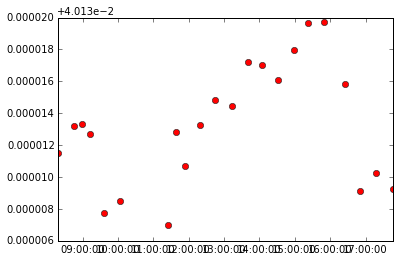

In [300]:
plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "NIST 200ppb"]
plot_Nist = plot_Nist[(plot_Nist["118"] >= .5)]
#dataplot = plot(plot_Nist["Te/Sn"], plot_Nist["124/118"], "ro")
dataplot = plot(plot_Nist.index, plot_Nist["112/118"], "ro")
#dataplot = plot(plot_Nist.index, plot_Nist["120"], "ro")
show(dataplot)

In [388]:
sub_index = df_internal_norm_mean[(df_internal_norm_mean["sample"].shift(1) == df_internal_norm_mean["sample"].shift(-1)) & (df_internal_norm_mean["sample"].shift(1) == "NIST 200ppb")].index
#corr_values = df_internal_norm_mean[(df_external_norm_mean >= 0.74289)]
#corr_values = df_internal_norm_mean[:"20150110 10:00"]
corr_values = df_internal_norm_mean[df_internal_norm_mean["118"] >= 1]
#corr_values = df_internal_norm_mean
sample = corr_values["sample"]
std_mean = corr_values[(corr_values["sample"] == "NIST 100ppb")].mean()
new = corr_values[corr_values.columns[corr_values.dtypes != 'object']]

#std_mean["112/120", "114/120", "115/120", "117/120", "118/120", "119/120", "122/120", "124/120"] = [0.029823, 0.020189, 0.010372, 0.235299, 0.742923, 0.263443, 0.142078, 0.177546]
#print std_mean
#epsilon =  ((new / std_mean)-1)*10000
#new["sample"] = sample
epsilon_NIST =  ((new / ((new.shift(1) + new.shift(-1))/2))-1)*10000
epsilon_2 = ((new / ((new.shift(2) + new.shift(-2))/2))-1)*10000
epsilon_NIST["sample"] = sample
epsilon_2["sample"] = sample

epsilon_NIST = epsilon_NIST[new.index.isin(sub_index)]
#new[new.sample != "NIST 100ppb"]
epsilon_2 = epsilon_2[epsilon_2["sample"] == "NIST 200ppb"]
epsilon_comp = epsilon_NIST.append(epsilon_2, ignore_index=True)
epsilon_comp

,111/120,112/120,113/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,...,117,118,119,120,122,124,125,Cd/Sn,Te/Sn,sample
0,362.329217,-0.182942,-882.254909,-0.233228,-0.095279,-1.110223e-12,0.086080,0.027675,-0.088512,0.122797,...,8.588001,8.406764,8.177519,8.134346,8.003869,7.638580,-378.989054,242.125013,-387.220812,NIST 200ppb
1,-3259.040858,0.430088,2670.219749,1.021581,0.329577,0.000000e+00,0.059233,0.213634,0.311160,0.462492,...,8356.674247,8356.561742,8356.358506,8355.401444,8355.505392,8355.051423,8575.598164,-3219.981836,132.827249,NIST 350ppb
2,112.978551,0.118278,-1425.735748,0.257617,-0.140813,-1.110223e-12,0.032641,-0.018987,-0.010695,-0.195709,...,67.867674,67.788014,67.761724,67.748242,67.547006,67.425812,43.724495,45.185571,-12.013105,NIST 200ppb + 0.056ppb Zr
3,-3116.499887,0.067410,2107.120684,1.248227,0.514317,2.220446e-12,0.028722,0.196434,0.329184,0.619553,...,8629.684094,8629.556182,8629.365689,8628.317423,8628.601672,8628.054605,8571.192776,-3160.809560,-27.490793,NIST 350ppb
4,382.678949,-0.480560,-1324.347825,-0.741880,1.032789,0.000000e+00,0.118576,0.002410,-0.083907,-0.157182,...,-2.315794,-2.428628,-2.417227,-2.350148,-2.421349,-2.326855,-679.738908,382.458347,-694.845117,NIST 200ppb + 0.440ppb Mo
5,-339.342729,-0.396560,1051.807120,0.611738,1.568781,-1.110223e-12,0.063779,0.019516,0.093208,0.071425,...,266.869203,266.901663,267.031401,266.936741,267.070060,267.143668,547.132576,-339.478068,271.702206,NIST 200ppb + 0.250ppb Pd
6,839.566093,-0.787000,-2292.579456,-1.291168,-0.608685,-1.110223e-12,-0.110179,0.093893,0.192232,0.031316,...,-163.267867,-163.096190,-162.995977,-163.236663,-163.250588,-163.283554,-31.798647,912.089443,115.595792,NIST 200ppb
7,-723.047604,0.663643,1831.015059,1.393303,0.876814,0.000000e+00,-0.024714,-0.175755,-0.180039,0.130285,...,132.683265,132.544120,132.485273,132.749610,132.916244,133.106621,457.603634,-754.431404,325.411302,NIST 200ppb
8,299.315822,-0.092952,92.179872,-0.381539,-0.017003,0.000000e+00,0.124005,0.086614,-0.001129,-0.094192,...,-469.183662,-469.229549,-469.272874,-469.316770,-469.432748,-469.629132,-1143.365421,429.492750,-888.696991,NIST 200ppb
9,143.336186,-0.352205,-503.848956,-0.540552,-0.465914,0.000000e+00,-0.049173,0.021531,0.150137,0.020975,...,652.347728,652.489006,652.645375,652.565565,652.707666,652.929287,1153.024270,-177.174241,898.419111,NIST 200ppb


In [31]:
def SD2(x):
    SD2 = np.std(x) * 2
    return SD2

epsilon = epsilon_comp.drop(["111", "125", "112", "114", "115", "116", "117", "118", "119", "120", "122", "124", "Cd/Sn", "Te/Sn"], axis = 1)
#epsilon = epsilon.drop(["118"], axis = 1)
epsilon_sum = np.round(epsilon.groupby("sample").agg([np.mean, SD2]), decimals=2)
epsilon_sum

112/120       114/120       115/120       116/120     117/120  \
                mean   SD2    mean   SD2    mean   SD2    mean SD2    mean   
sample                                                                       
NIST 100ppb    -0.01  1.70    0.01  2.57   -0.29  2.75       0   0   -0.01   
SPEX1 100ppb   -0.65  0.59   -0.56  0.80    7.20  2.68      -0   0    0.03   

                   118/120       119/120       122/120       124/120        
               SD2    mean   SD2    mean   SD2    mean   SD2    mean   SD2  
sample                                                                      
NIST 100ppb   0.15   -0.03  0.18   -0.02  0.22   -0.01  0.34    0.04  0.61  
SPEX1 100ppb  0.17    0.05  0.09   -0.02  0.12   -0.11  0.19   -0.15  0.19

In [29]:
x = range(1, len(epsilon_sum.index)+1)
errorbar(epsilon_sum["112/118"]["mean"], x, xerr = epsilon_sum["112/118"]["SD2"], ls='none', marker="o")
title("all standards")
xlim([-4, 4])
ylim([0.5, 2.5])
yticks(x, epsilon_sum.index, size='small', rotation=0)
ylabel(r'$\mathregular{\epsilon^{112}}$Sn$_{SPEX}$')
#savefig(path_sav+"epsilon_124_stds.pdf", bbox_inches='tight')

NameError: name 'errorbar' is not defined

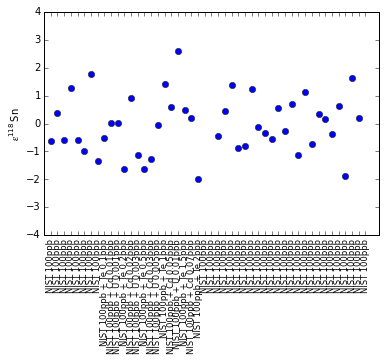

In [133]:
x = range(1, len(epsilon_comp["sample"])+1)
plot(x, epsilon_comp["112/120"], marker="o", ls="none")
ylim([-4, 4])
xticks(x, epsilon_comp["sample"], size='small', rotation=90)
ylabel(r'$\mathregular{\epsilon^{118}}$Sn')
#savefig(path+"epsilon_119.pdf", bbox_inches='tight')

In [13]:
df_all.to_csv(path + "Sn_H8_L4_2_cycles_NU_Signals_zero_corr.csv", mode='a', header=False)

In [101]:
df_internal_norm.to_csv(path + "Sn_H8_L4_2_cycles_internal_norm_122_118_bdg_corr_all_126Te.csv", mode='w', header=True)

In [406]:
df_internal_norm_mean_sd.to_csv(path + "Sn_H8_L4_2_cycles_internal_norm_116_120_bgd_corr.csv", mode='w', header=True)

In [103]:
df_std.to_csv(path_sav + "All_standards_internal_norm_mean.csv")

NameError: name 'df_std' is not defined

In [986]:
df_all_mean_1 = pd.read_csv(path_sav + "Sn_H9_L4_1_cycles_internal_norm_mean.csv")

In [987]:
df_all_mean_2 = pd.read_csv(path_sav + "Sn_H8_L4_2_cycles_internal_norm_mean.csv")

In [1088]:
df_mean_all = df_all_mean_1.append(df_all_mean_2)

In [30]:
#old Cd/Sn & Te/Sn extraction - doesn't include bgd corr
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

df_all_sub = df_all[(df_all["sample"] != "blank sol") & (df_all["sample"] != "SQ") & (df_all["sample"] != "teflon blank")]
df_internal_sub["111"] = df_all_sub["L3 (1)"]
df_internal_sub["125"] = df_all_sub["H5 (2)"]
df_internal_sub["Cd/Sn"] = (df_all_sub["L3 (1)"]/12.722)/(df_all_sub["H4 (1)"]/24.223)
df_internal_sub["Te/Sn"] = (df_all_sub["H5 (2)"]/7.0509)/(df_all_sub["H4 (1)"]/24.223)
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")

In [1089]:
df_mean_all = df_mean_all[2:]
df_mean_all.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df_mean_all = df_mean_all[["Date", "112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118","sample"]]
df_mean_all = df_mean_all.set_index("Date") 

In [1182]:
df_std = df_mean_all[(df_mean_all["sample"] == "SPEX1 100ppb") | (df_mean_all["sample"] == "SPEX 100ppb") | (df_mean_all["sample"] == "NIST 100ppb")]
df_std

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-10-07 20:49:00,0.0298238495726,0.0201845997439,0.0103681594438,0.446,0.235295696368,0.742939518097,0.263445942562,0.142086185109,0.177571556759,10.1619395381,SPEX1 100ppb
2014-10-07 21:07:00,0.0298270855009,0.0201887834143,0.0103664239291,0.446,0.235295260593,0.742937654621,0.263447680516,0.14208571056,0.177573088542,10.2834847296,SPEX1 100ppb
2014-10-07 21:29:00,0.0298241010738,0.0201850728708,0.0103667030734,0.446,0.235295046713,0.742937732217,0.263449417694,0.142085954225,0.17757007419,10.0068814188,SPEX1 100ppb
2014-10-07 21:46:00,0.0298269719657,0.0201827454973,0.0103676568054,0.446,0.235297077525,0.742936157145,0.263450048386,0.142089277895,0.177573191934,10.1732362802,SPEX1 100ppb
2014-11-18 18:22:00,0.0298319477344,0.0201968060654,0.0103609914838,0.446,0.235308007067,0.74295144542,0.263456437295,0.142073025422,0.17753393783,11.9205622223,NIST 100ppb
2014-11-18 18:27:00,0.0298302415426,0.0202014506204,0.0103609667001,0.446,0.235304600881,0.742949759778,0.263451222795,0.142074064497,0.177531032284,11.8435340427,NIST 100ppb
2014-11-18 18:31:00,0.029834566445,0.0202024281122,0.0103608586407,0.446,0.235309236679,0.742955467382,0.263452936054,0.142073215452,0.177533064574,11.3634385069,NIST 100ppb
2014-11-18 18:36:00,0.0298236482085,0.0201946006554,0.0103617565758,0.446,0.235308318118,0.742946848523,0.263449990275,0.142074569672,0.177530832831,11.5416992302,NIST 100ppb
2014-11-18 18:40:00,0.0298227478429,0.0201921659888,0.0103615705949,0.446,0.235307461611,0.742950591745,0.263450041891,0.142075223065,0.177536326791,11.6314409578,NIST 100ppb


In [1183]:
df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]] = df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]].astype(float)
df_std.index = df_std.index.astype(datetime64)
df_std = df_std[(df_std.index < pd.Timestamp('2015-03-10')) | (df_std.index > pd.Timestamp('2015-03-12'))]
df_std = df_std[(df_std.index < pd.Timestamp('2014-11-29 18:25:00')) | (df_std.index > pd.Timestamp('2014-11-29 20:27:00'))]
df_std

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-10-07 18:49:00,0.029824,0.020185,0.010368,0.446,0.235296,0.742940,0.263446,0.142086,0.177572,10.161940,SPEX1 100ppb
2014-10-07 19:07:00,0.029827,0.020189,0.010366,0.446,0.235295,0.742938,0.263448,0.142086,0.177573,10.283485,SPEX1 100ppb
2014-10-07 19:29:00,0.029824,0.020185,0.010367,0.446,0.235295,0.742938,0.263449,0.142086,0.177570,10.006881,SPEX1 100ppb
2014-10-07 19:46:00,0.029827,0.020183,0.010368,0.446,0.235297,0.742936,0.263450,0.142089,0.177573,10.173236,SPEX1 100ppb
2014-11-18 17:22:00,0.029832,0.020197,0.010361,0.446,0.235308,0.742951,0.263456,0.142073,0.177534,11.920562,NIST 100ppb
2014-11-18 17:27:00,0.029830,0.020201,0.010361,0.446,0.235305,0.742950,0.263451,0.142074,0.177531,11.843534,NIST 100ppb
2014-11-18 17:31:00,0.029835,0.020202,0.010361,0.446,0.235309,0.742955,0.263453,0.142073,0.177533,11.363439,NIST 100ppb
2014-11-18 17:36:00,0.029824,0.020195,0.010362,0.446,0.235308,0.742947,0.263450,0.142075,0.177531,11.541699,NIST 100ppb
2014-11-18 17:40:00,0.029823,0.020192,0.010362,0.446,0.235307,0.742951,0.263450,0.142075,0.177536,11.631441,NIST 100ppb


In [1184]:
df_std = df_std[(df_std["118"] > 5) & (df_std["118/120"] > 0.7428)]
for i in df_std.index[df_std["sample"] == "SPEX1 100ppb"]:
    df_std.ix[i, "sample"] = "SPEX 100ppb"

In [1220]:
sample = df_std["sample"]
std_mean = df_std[(df_std["sample"] == "SPEX 100ppb")].mean()
new = df_std[df_std.columns[df_std.dtypes != 'object']]
epsilon =  ((new / std_mean)-1)*10000
epsilon["sample"] = sample
epsilon
epsilon[(epsilon["118/120"] > 0.4) | (epsilon["118/120"] < -0.4)]

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-11-18 18:54:00,-1.295126,-1.053575,1.608025,1.998401e-11,-1.180555,-0.463371,-0.356364,0.722133,2.010156,1309.494419,SPEX 100ppb
2014-12-06 22:37:00,-4.936059,-7.445774,1.331682,1.998401e-11,0.786625,0.539985,1.003885,0.222717,0.767402,-1614.119882,SPEX 100ppb
2014-12-06 22:52:00,-1.620072,-3.896472,0.536870,1.998401e-11,0.533814,0.527568,1.004705,0.469725,1.664357,-1804.778746,SPEX 100ppb
2014-12-06 23:08:00,-2.641746,-4.386719,2.125820,1.998401e-11,0.522416,0.475452,0.892735,0.462190,1.555222,-1848.039153,SPEX 100ppb
2014-12-06 23:23:00,-3.243182,-3.908338,-0.299309,1.998401e-11,0.613841,0.489401,0.951723,0.466426,1.660720,-1728.263406,SPEX 100ppb
2014-12-06 23:39:00,-3.174104,-5.626922,2.187946,1.998401e-11,0.711496,0.500329,0.913301,0.302836,1.500547,-1512.382276,SPEX 100ppb
2014-12-06 23:54:00,-2.499252,-3.686348,3.196847,1.998401e-11,0.532245,0.565307,0.943385,0.268384,1.570411,-1442.654967,SPEX 100ppb
2014-12-07 00:09:00,-3.167063,-4.997893,0.608021,1.998401e-11,0.745353,0.520016,1.039127,0.455542,1.559710,-1523.698889,SPEX 100ppb
2014-12-07 00:25:00,-2.027759,-4.105014,2.820000,1.998401e-11,0.605650,0.507195,0.913818,0.470145,1.538801,-1719.373397,SPEX 100ppb


In [1222]:
lee = pd.DataFrame({"112/120" : pd.Series(0.029812), "114/120" : pd.Series(0.020195), "115/120": pd.Series(0.010366), "116/120": pd.Series(0.4460), "117/120" : pd.Series(0.235313), "118/120" : pd.Series(0.742935), "119/120" : pd.Series(0.263430), "122/120" : pd.Series(0.142086), "124/120" : pd.Series(0.177588)})
epsilon_lee = ((lee / std_mean[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120"]])-1)*10000
epsilon_lee["sample"] = "Lee et al. (1995)"
epsilon_lee

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,sample
0,-4.252887,1.76055,-2.836398,1.998401e-11,0.6046,0.052729,-0.550984,0.411199,1.946529,Lee et al. (1995)
